#### 数据背景：德国某电信行业的客户历史交易数据，该数据集一共包含4681条记录，19个变量，其中churn为二元变量，yes代表客户流失，no代表客户未流失。

In [1]:
#导入第三方包
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn import tree
from sklearn import  metrics
from imblearn.over_sampling import SMOTE

In [2]:
#读取数据
churn = pd.read_excel('Customer_Churn.xlsx')
churn.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
4,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


In [3]:
#中文乱码和坐标轴符号问题处理
plt.rcParams['font.sans-serif'] = ['Simhei']    #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号 

In [4]:
#为确保绘制的饼图为圆形
plt.axes(aspect = 'equal')

In [5]:
#统计交易是否为欺诈的频数
counts = churn.churn.value_counts()
counts

no     4293
yes     388
Name: churn, dtype: int64

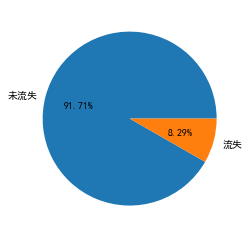

In [6]:
#绘制饼图
plt.pie(x= counts,
        labels=pd.Series(counts.index).map({'yes':'流失','no':'未流失'}),#添加文字标签
       autopct = '%.2f%%'#设置百分比格式，保留1位小数
       )
#显示图形
plt.show()

In [7]:
#数据清洗
# 删除state变量和area_code变量
churn.drop(labels=['state','area_code'],axis=1,inplace=True)

In [8]:
# 将二元变量international_plan和voice_mail_plan转换为0-1哑变量
churn.international_plan = churn.international_plan.map({'no':0,'yes':1})
churn.voice_mail_plan = churn.voice_mail_plan.map({'no':0,'yes':1})
churn.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


In [9]:
# 用于建模的所有自变量
predictors = churn.columns[:-1]
predictors.shape

(17,)

In [10]:
X = churn[predictors]
X.shape

(4681, 17)

In [11]:
y = churn.churn
y.shape

(4681,)

In [12]:
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,random_state=12)

In [13]:
#构建决策树
DT = tree.DecisionTreeClassifier()
DT.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [14]:
# 模型在测试集上的预测
pred = DT.predict(X_test)

In [15]:
# 模型的预测准确率
print(metrics.accuracy_score(y_test, pred))

0.934244235696


In [16]:
# 模型评估报告
print(metrics.classification_report(y_test, pred))

             precision    recall  f1-score   support

         no       0.96      0.96      0.96      1062
        yes       0.65      0.65      0.65       109

avg / total       0.93      0.93      0.93      1171



In [17]:
# 绘制ROC曲线
# 计算流失用户的概率值，用于生成ROC曲线的数据
y_score = DT.predict_proba(X_test)[:,1]
fpr,tpr,threshold = metrics.roc_curve(y_test.map({'no':0,'yes':1}), y_score)

In [18]:
# 计算AUC的值
roc_auc = metrics.auc(fpr,tpr)

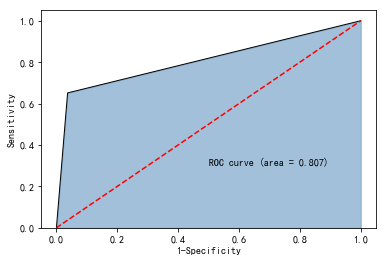

In [19]:
# 绘制面积图
plt.stackplot(fpr, tpr, color='steelblue', alpha = 0.5, edgecolor = 'black')
# 添加边际线
plt.plot(fpr, tpr, color='black', lw = 1)
# 添加对角线
plt.plot([0,1],[0,1], color = 'red', linestyle = '--')
# 添加文本信息
plt.text(0.5,0.3,'ROC curve (area = %0.3f)' % roc_auc)
# 添加x轴与y轴标签
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
# 显示图形
plt.show()

In [20]:
# 对训练数据集作平衡处理
over_samples = SMOTE(random_state=1234) 
over_samples_X,over_samples_y = over_samples.fit_sample(X_train, y_train)
# 重抽样前的类别比例
print(y_train.value_counts()/len(y_train))
# 重抽样后的类别比例
print(pd.Series(over_samples_y).value_counts()/len(over_samples_y))

no     0.920513
yes    0.079487
Name: churn, dtype: float64
yes    0.5
no     0.5
dtype: float64


In [21]:
# 基于平衡数据重新构建决策树模型
dt2 = tree.DecisionTreeClassifier()
dt2.fit(over_samples_X,over_samples_y)
# 模型在测试集上的预测
pred2 = dt2.predict(np.array(X_test))

In [22]:
# 模型的预测准确率
print(metrics.accuracy_score(y_test, pred2))
# 模型评估报告
print(metrics.classification_report(y_test, pred2))

0.924850555081
             precision    recall  f1-score   support

         no       0.97      0.95      0.96      1062
        yes       0.58      0.70      0.63       109

avg / total       0.93      0.92      0.93      1171



In [23]:
# 计算流失用户的概率值，用于生成ROC曲线的数据
y_score = dt2.predict_proba(np.array(X_test))[:,1]
fpr,tpr,threshold = metrics.roc_curve(y_test.map({'no':0,'yes':1}), y_score)
# 计算AUC的值
roc_auc = metrics.auc(fpr,tpr)

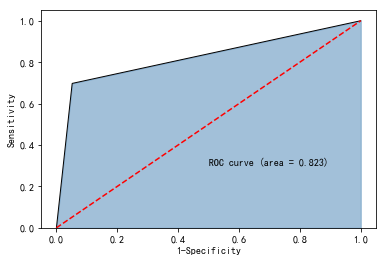

In [24]:
# 绘制面积图
plt.stackplot(fpr, tpr, color='steelblue', alpha = 0.5, edgecolor = 'black')
# 添加边际线
plt.plot(fpr, tpr, color='black', lw = 1)
# 添加对角线
plt.plot([0,1],[0,1], color = 'red', linestyle = '--')
# 添加文本信息
plt.text(0.5,0.3,'ROC curve (area = %0.3f)' % roc_auc)
# 添加x轴与y轴标签
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
# 显示图形
plt.show()